# Regressão Linear

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns 
%matplotlib inline

## Carregamento e Limpeza dos Dados

In [182]:
df = pd.read_csv(r"C:\Users\natic\OneDrive\Documentos\Codigos Py\Pós-Graduação\RNA-DP\Salary_dataset.csv")

In [183]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [184]:
# Remove a coluna 'Unnamed: 0'
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [185]:
# Informações do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [186]:
# Tratamento de Dados Nulos
nulos = df.isna().sum().sum()

print(f"Total de dados nulos no dataset: {nulos}")

if nulos == 0:  # CORREÇÃO: Usar '==' para comparação
    print('Não há dados nulos para tratar.')
else:
    print('Há dados nulos para tratar! Necessário imputação ou remoção.')
    # df.fillna(df.mean(), inplace=True) 
    # ou
    # df.dropna(inplace=True)

Total de dados nulos no dataset: 0
Não há dados nulos para tratar.


## Análise de dados

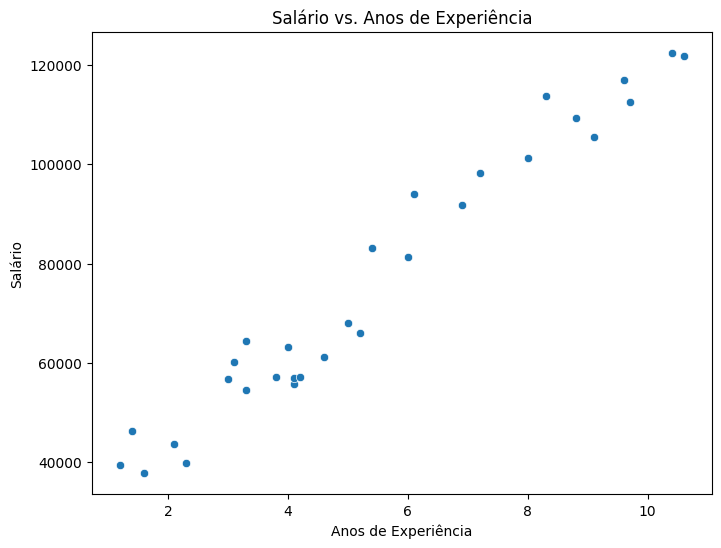

In [187]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title('Salário vs. Anos de Experiência')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.show()

# A visualização confirma uma relação linear clara.

## Separação dos Dados (Feature X e Target Y)

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X = df[['YearsExperience']] # Variável Preditiva (Duplo colchete para DataFrame)
y = df['Salary']          # Variável Alvo

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% para teste
                                                    random_state=42) # Para reprodutibilidade

print(f"\nDados de Treino: {len(X_train)} amostras")
print(f"Dados de Teste: {len(X_test)} amostras")


Dados de Treino: 24 amostras
Dados de Teste: 6 amostras


## Treinamento do Modelo RL

In [191]:
from sklearn.linear_model import LinearRegression

In [192]:
reg = LinearRegression() 
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Avaliação do Modelo

In [193]:
# a. Parâmetros
# O coeficiente slop indica o quanto o Salário aumenta para cada ano adicional de experiência.
print("\n--- Parâmetros do Modelo ---")
print(f"Coeficiente (AnosExperiência): {reg.coef_[0]:.2f}")
print(f"Intercepto: {reg.intercept_:.2f}")


--- Parâmetros do Modelo ---
Coeficiente (AnosExperiência): 9423.82
Intercepto: 24380.20


In [194]:
# b. Predição usando os dados de teste
y_pred = reg.predict(X_test)

In [195]:
# c. Métricas de Desempenho
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- 7c. Métricas de Avaliação ---")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")


--- 7c. Métricas de Avaliação ---
Erro Quadrático Médio (MSE): 49830096.86
Raiz do Erro Quadrático Médio (RMSE): 7059.04
Coeficiente de Determinação (R²): 0.9024


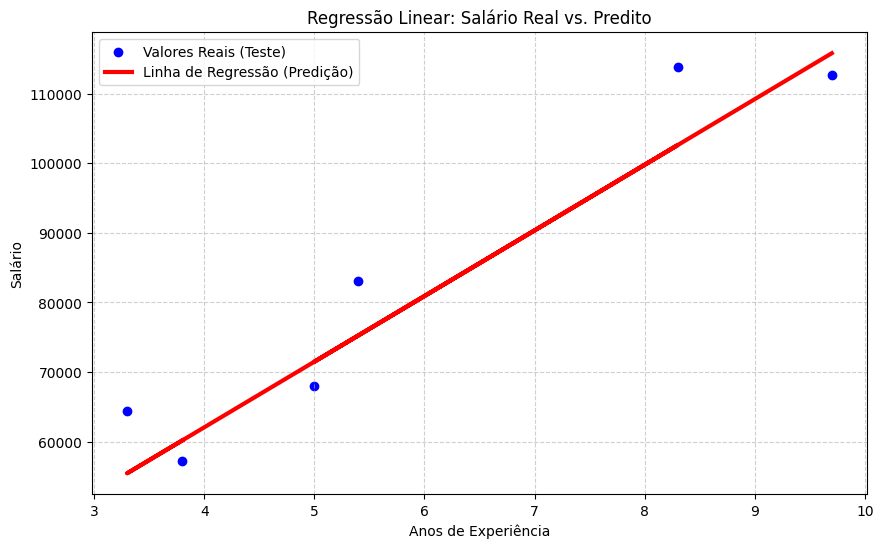

In [196]:
# d. Visualização da Reta de Regressão
plt.figure(figsize=(10, 6))
# Gráfico de dispersão dos dados de teste
plt.scatter(X_test, y_test, color='blue', label="Valores Reais (Teste)")
# Linha de Regressão (predições)
plt.plot(X_test, y_pred, color='red', linewidth=3, label="Linha de Regressão (Predição)")
plt.title("Regressão Linear: Salário Real vs. Predito")
plt.xlabel("Anos de Experiência")
plt.ylabel("Salário")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Conclusão

In [197]:
r2_percent = r2 * 100

print(f"\n{'='*50}")
print("CONCLUSÃO FINAL DO MODELO")
print(f"{'='*50}")
print(f"O modelo de Regressão Linear Simples foi treinado para prever o Salário (Y) a partir dos Anos de Experiência (X).")
print(f"\n**Performance do Modelo (no conjunto de Teste):**")
print(f"- R² (Coeficiente de Determinação): {r2_percent:.2f}%")
print(f"- RMSE (Erro Típico): R$ {rmse:.2f}")


print(f"\n**Significado dos resultados:**")
print(f"- Força do Modelo:\n O R² de {r2_percent:.2f}% é excelente, indicando que a variável 'Anos de Experiência' é,\n de fato, um preditor muito forte e explica mais de {r2_percent:.2f}% da variação nos salários.")
print(f"\n- Interpretação Econômica: O coeficiente (slope) de R$ {reg.coef_[0]:.2f} significa que, a cada um ano adicional de experiência,\n o modelo prevê um aumento médio de R$ {reg.coef_[0]:.2f} no salário.")



CONCLUSÃO FINAL DO MODELO
O modelo de Regressão Linear Simples foi treinado para prever o Salário (Y) a partir dos Anos de Experiência (X).

**Performance do Modelo (no conjunto de Teste):**
- R² (Coeficiente de Determinação): 90.24%
- RMSE (Erro Típico): R$ 7059.04

**Significado dos resultados:**
- Força do Modelo:
 O R² de 90.24% é excelente, indicando que a variável 'Anos de Experiência' é,
 de fato, um preditor muito forte e explica mais de 90.24% da variação nos salários.

- Interpretação Econômica: O coeficiente (slope) de R$ 9423.82 significa que, a cada um ano adicional de experiência,
 o modelo prevê um aumento médio de R$ 9423.82 no salário.
